In [ ]:
#From https://www.kaggle.com/code/thedrcat/detectai-transformers-baseline

In [1]:
import transformers
import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
cmap = mpl.cm.get_cmap("coolwarm")

/home/cybertron/anaconda3/envs/sgpt/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/tmp/ipykernel_26029/933712043.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap("coolwarm")


In [2]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
model_checkpoint = 'microsoft/deberta-v3-xsmall'
num_labels = 2
#model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint, num_labels=num_labels)

In [3]:
class CFG:
    class_names = ["real", "fake"]  # Class names [A, B, C, D, E]
    num_classes = len(class_names)  # Number of classes
    class_labels = list(range(num_classes))  # Class labels [0, 1, 2, 3, 4]
    label2name = dict(zip(class_labels, class_names)) 

In [4]:
df = pd.read_csv('/media/cybertron/fa54fcb6-b5e1-492e-978a-6389519c168a/llm_detect/external_dataset/daigt-v2-train-dataset/train_v2_drcat_02.csv')

df['name'] = df.label.map(CFG.label2name)
display(df.head())



,text,label,prompt_name,source,RDizzl3_seven,name
0,Phones\n\nModern humans today are always on th...,0,Phones and driving,persuade_corpus,False,real
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False,real
2,Driving while the use of cellular devices\n\nT...,0,Phones and driving,persuade_corpus,False,real
3,Phones & Driving\n\nDrivers should not be able...,0,Phones and driving,persuade_corpus,False,real
4,Cell Phone Operation While Driving\n\nThe abil...,0,Phones and driving,persuade_corpus,False,real


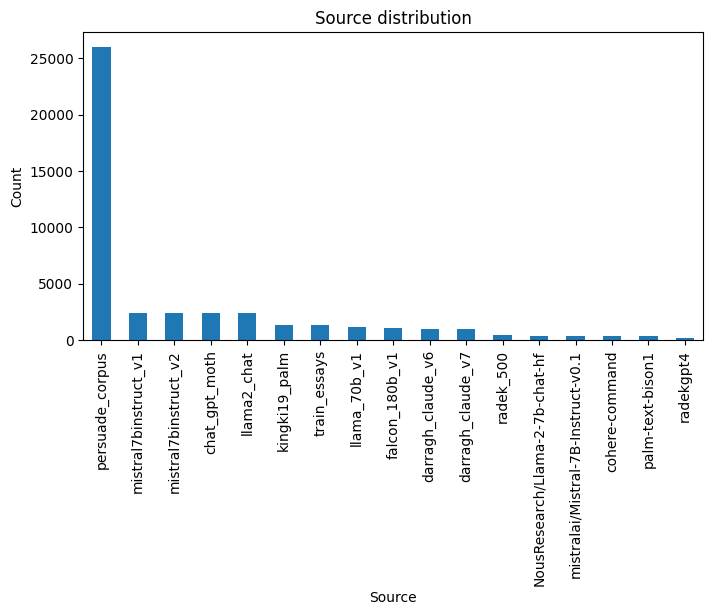

# Train Data: 44,868


,text,label,prompt_name,source,RDizzl3_seven,name
0,Phones\n\nModern humans today are always on th...,0,Phones and driving,persuade_corpus,False,real
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False,real


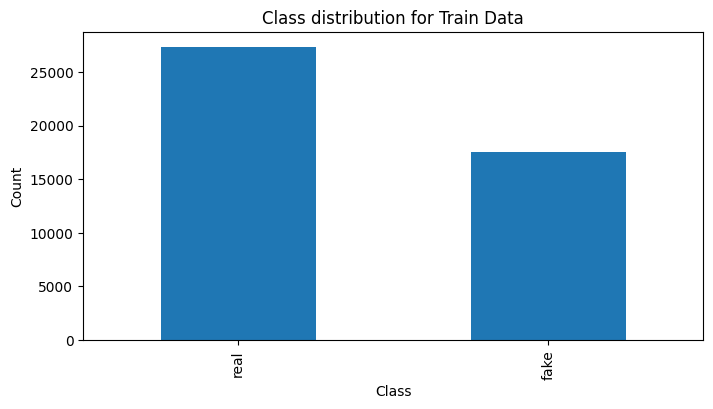

In [5]:
# Show distribution of answers using a bar plot
plt.figure(figsize=(8, 4))
#df.name.value_counts().plot.bar(color=[cmap(0.0), cmap(0.25), cmap(0.65), cmap(0.9), cmap(1.0)])
df.source.value_counts().plot.bar()
plt.xlabel("Source")
plt.ylabel("Count")
plt.title("Source distribution")
plt.show()


print("# Train Data: {:,}".format(len(df)))
display(df.head(2))
# Show distribution of answers using a bar plot
plt.figure(figsize=(8, 4))
#df.name.value_counts().plot.bar(color=[cmap(0.0), cmap(0.25), cmap(0.65), cmap(0.9), cmap(1.0)])
df.name.value_counts().plot.bar()
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class distribution for Train Data")
plt.show()

In [6]:
np.random.seed(404)

msk = np.random.rand(len(df)) < 0.8
train = df[msk]
valid = df[~msk]

# Train Data: 36,031


,text,label,prompt_name,source,RDizzl3_seven,name
0,Phones\n\nModern humans today are always on th...,0,Phones and driving,persuade_corpus,False,real
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False,real


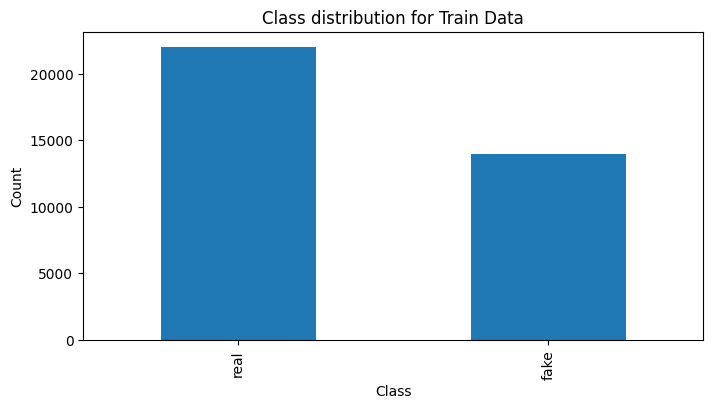

# val Data: 8,837


,text,label,prompt_name,source,RDizzl3_seven,name
2,Driving while the use of cellular devices\n\nT...,0,Phones and driving,persuade_corpus,False,real
5,Cell phone use should not be legal while drivi...,0,Phones and driving,persuade_corpus,False,real


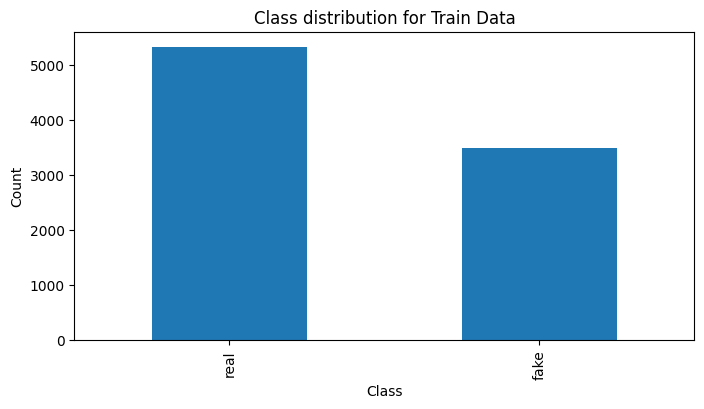

In [7]:
print("# Train Data: {:,}".format(len(train)))
display(train.head(2))
# Show distribution of answers using a bar plot
plt.figure(figsize=(8, 4))
#df.name.value_counts().plot.bar(color=[cmap(0.0), cmap(0.25), cmap(0.65), cmap(0.9), cmap(1.0)])
train.name.value_counts().plot.bar()
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class distribution for Train Data")
plt.show()

print("# val Data: {:,}".format(len(valid)))
display(valid.head(2))
# Show distribution of answers using a bar plot
plt.figure(figsize=(8, 4))
#df.name.value_counts().plot.bar(color=[cmap(0.0), cmap(0.25), cmap(0.65), cmap(0.9), cmap(1.0)])
valid.name.value_counts().plot.bar()
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class distribution for Train Data")
plt.show()

In [8]:
# train = df[df.prompt_name != 'Car-free cities'].reset_index(drop=True)
# valid = df[df.prompt_name == 'Car-free cities'].reset_index(drop=True)
# train.head()
# print(len(train),len(valid))

In [9]:
# Undersample persuada corpus

In [10]:
# not_persuade_df = train[train.source != 'persuade_corpus']
# persuade_df = train[train.source != 'persuade_corpus']

# sampled_persuade_df = persuade_df.sample(n=6000, random_state=42)

In [11]:
# Testing idea from discussion with @nbroad about limited characters in human essays
# all_human = set(list(''.join(sampled_persuade_df.text.to_list())))
# other = set(list(''.join(not_persuade_df.text.to_list())))

In [12]:
# chars_to_remove = ''.join([x for x in other if x not in all_human])
# print(chars_to_remove)

In [13]:
# translation_table = str.maketrans('', '', chars_to_remove)
# def remove_chars(s):
#     return s.translate(translation_table)
# not_persuade_df['text'] = not_persuade_df['text'].apply(remove_chars)

In [14]:
# train = pd.concat([not_persuade_df, sampled_persuade_df]).sample(frac=1, random_state=42).reset_index(drop=True)
# train.source.value_counts()

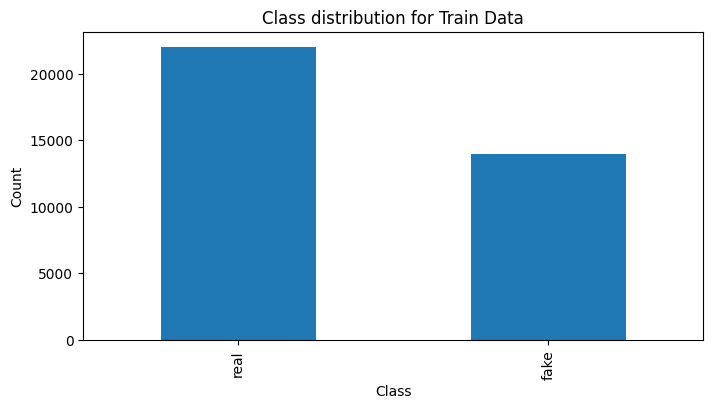

In [15]:
plt.figure(figsize=(8, 4))
#df.name.value_counts().plot.bar(color=[cmap(0.0), cmap(0.25), cmap(0.65), cmap(0.9), cmap(1.0)])
train.name.value_counts().plot.bar()
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class distribution for Train Data")
plt.show()

In [16]:
from datasets import Dataset

# ds_train = Dataset.from_pandas(train)
# ds_valid = Dataset.from_pandas(valid)
# ds_train
dataset = Dataset.from_pandas(df)
dataset

Dataset({
    features: ['text', 'label', 'prompt_name', 'source', 'RDizzl3_seven', 'name'],
    num_rows: 44868
})

In [17]:
from transformers import AutoTokenizer, DataCollatorWithPadding
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, use_fast=True)


/home/cybertron/anaconda3/envs/sgpt/lib/python3.10/site-packages/transformers/convert_slow_tokenizer.py:473: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


In [18]:
def preprocess_function(examples):
    return tokenizer(examples['text'],  truncation=True)

# Takes tokenizer as input to find out padding format/method
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [19]:
tokenized_datasets = dataset.map(preprocess_function,batched=True)

Map: 100%|███████████████████████| 44868/44868 [00:13<00:00, 3347.79 examples/s]


In [20]:
tokenized_datasets

Dataset({
    features: ['text', 'label', 'prompt_name', 'source', 'RDizzl3_seven', 'name', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 44868
})

In [21]:
# ds_train_enc = dataset.map(preprocess_function,batched=True)

tokenized_datasets = tokenized_datasets.remove_columns(['text', 'prompt_name', 'source', 'RDizzl3_seven', 'name'])
tokenized_datasets = tokenized_datasets.rename_column("label","labels")
tokenized_datasets.set_format("torch")
tokenized_datasets.column_names

['labels', 'input_ids', 'token_type_ids', 'attention_mask']

In [22]:
split_datasets = tokenized_datasets.train_test_split(test_size=0.2)
print(split_datasets)

DatasetDict({
    train: Dataset({
        features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 35894
    })
    test: Dataset({
        features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 8974
    })
})


In [23]:
# dataloaders

from torch.utils.data import DataLoader

train_dataloader = DataLoader(split_datasets['train'], shuffle=True, batch_size=8, collate_fn=data_collator)
eval_dataloader = DataLoader(split_datasets['test'], batch_size=8, collate_fn=data_collator)

In [24]:
# inspect a batch to ensure no mistake in data processing
for batch in train_dataloader:
    break
#{k:v.shape for k,v in batch.items()}
print(batch)

You're using a DebertaV2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


{'labels': tensor([0, 1, 1, 1, 0, 1, 0, 0]), 'input_ids': tensor([[    1,   443,   281,  ...,     0,     0,     0],
        [    1, 10147,  7455,  ...,  5445,   592,     2],
        [    1,  5388,   261,  ...,     0,     0,     0],
        ...,
        [    1, 79853,   640,  ...,     0,     0,     0],
        [    1, 29559,   261,  ...,     0,     0,     0],
        [    1, 10147, 95742,  ...,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}


In [27]:

model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint, num_labels=num_labels)
outputs = model(**batch)
print(outputs.loss, outputs.logits.shape)

Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-xsmall and are newly initialized: ['pooler.dense.bias', 'classifier.weight', 'pooler.dense.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tensor(0.6955, grad_fn=<NllLossBackward0>) torch.Size([8, 2])


In [30]:

from transformers import AdamW

optimizer = AdamW(model.parameters(), lr=5e-5)
from transformers import get_scheduler

num_epochs = 1
num_training_steps = num_epochs * len(train_dataloader)
lr_scheduler = get_scheduler(
    "linear",
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=num_training_steps,)
print(num_training_steps)

import torch

device = torch.device('cuda') if torch.cuda.is_available() else torch.device("cpu")
model.to(device)
device

4487


device(type='cuda')

In [31]:
from tqdm.auto import tqdm

progress_bar = tqdm(range(num_training_steps))

model.train()

for epoch in range(num_epochs):
    for batch in train_dataloader:
        batch = {k:v.to(device) for k,v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()

        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()
        progress_bar.update(1)
        



  0%|                                                  | 0/4487 [00:17<?, ?it/s]

  0%|                                          | 2/4487 [00:01<44:41,  1.67it/s]

OutOfMemoryError: CUDA out of memory. Tried to allocate 222.00 MiB. GPU 0 has a total capacty of 11.91 GiB of which 136.44 MiB is free. Including non-PyTorch memory, this process has 11.54 GiB memory in use. Of the allocated memory 10.73 GiB is allocated by PyTorch, and 231.63 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [ ]:
metric_name = 'roc_auc'
model_name = 'deberta-xsmall'


In [ ]:
# dataloaders

from torch.utils.data import DataLoader

train_dataloader = DataLoader(
    train, shuffle=True, batch_size=8)
eval_dataloader = DataLoader(
    valid, batch_size=8)

In [ ]:
# inspect a batch to ensure no mistake in data processing
for batch in train_dataloader:
    break
{k:v.shape for k,v in batch.items()}

In [ ]:
from sklearn.metrics import roc_auc_score

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    probs = np.exp(logits) / np.sum(np.exp(logits), axis=-1, keepdims=True)
    auc = roc_auc_score(labels, probs[:,1], multi_class='ovr')
    return {'roc_auc':auc}
    

In [ ]:
trainer.train()

In [ ]:
test = pd.read_csv('/media/cybertron/fa54fcb6-b5e1-492e-978a-6389519c168a/llm_detect/dataset/test_essays.csv')
test_ds = Dataset.from_pandas(test)
test_ds_enc = test_ds.map(preprocess_function, batched=True)

In [ ]:
model.push_to_hub("dummy-model")
tokenizer.push_to_hub("dummy-model")

In [ ]:
train_dataloader